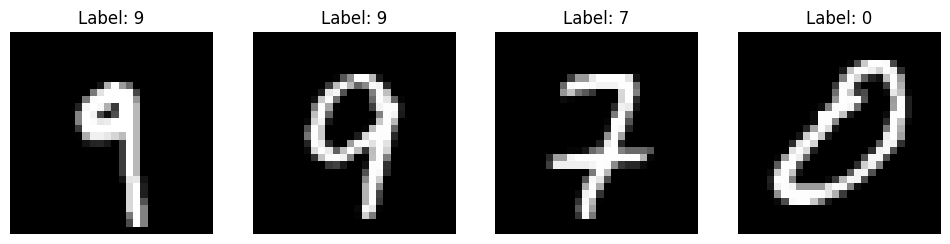

In [9]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import numpy as np

class CSVImageDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.data_frame = pd.read_csv(csv_file)

        # Drop 'id' column if it exists
        if 'id' in self.data_frame.columns:
            self.data_frame.drop(columns=['id'], inplace=True)

        self.transform = transform

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        # Assuming first column is 'label' after dropping 'id'
        image = self.data_frame.iloc[idx, :-1].to_numpy()
        image = image.astype('float').reshape(28, 28)  # Reshape to 28x28
        label = int(self.data_frame.iloc[idx, -1])  # First column is 'label'

        if self.transform:
            image = self.transform(image)

        return image, label

# Example usage
# transform = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.5,), (0.5,))  # Example normalization
# ])

csv_dataset = CSVImageDataset('train.csv')
dataloader = DataLoader(csv_dataset, batch_size=4)

import matplotlib.pyplot as plt

# Iterate through the DataLoader
for i, (images, labels) in enumerate(dataloader):
    # Display images from the first batch
    if i == 0:
        fig, axes = plt.subplots(1, len(images), figsize=(12, 12))
        for idx, image in enumerate(images):
            # Convert the tensor to a NumPy array and normalize it to the range [0, 1]
            img = image.numpy().squeeze() * 0.5 + 0.5  # assuming normalization of (0.5, 0.5)
            ax = axes[idx]
            ax.imshow(img, cmap='gray')
            ax.axis('off')
            ax.set_title(f'Label: {labels[idx]}')
        plt.show()
    break  # Only process the first batch